In [1]:
import numpy as np
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [5]:
print(boston.data.shape)

(506, 13)


In [9]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [206]:
data = boston.data
data.shape

(506, 13)

In [207]:
targets = boston.target

In [208]:
targets.shape

(506,)

In [209]:
weights_init = np.random.uniform(low=-1, high=1, size=13)
weights_init

array([ 0.53301095,  0.42255908, -0.96759197, -0.66763341,  0.79683587,
       -0.70900881,  0.99045966,  0.55630444,  0.11873273, -0.60044901,
       -0.50267242, -0.32107217,  0.94184162])

In [210]:
bias_init = 0

In [211]:
# Normalization

for i in range(13):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i]-feature_avg)/feature_max

In [212]:
def hypothesis(weights, bias):
    return data.dot(weights) + np.repeat(bias, 506)

In [213]:
hypothesis(weights_init, bias_init).shape

(506,)

In [215]:
def cost(weights, bias):
    return np.mean(np.square(hypothesis(weights, bias) - targets))/2
cost(weights_init, bias_init)

301.76982120203331

In [224]:
def gradient(weights, bias):
    weight_gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights, bias)-targets) * data[:, weight_num])
        weight_gradients.append(grad)
        
    weight_gradients = np.array(weight_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - targets)
    
    return (weight_gradients, bias_gradient)

In [225]:
gradient(weights_init, bias_init)

(array([ 0.40291729, -0.95926199,  2.0116167 , -0.4784606 ,  1.70474762,
        -1.90223772,  3.87517869, -0.72195986,  2.34872003,  2.6150131 ,
         2.82682199, -8.89623586,  2.12860074]), -22.53280632411067)

In [226]:
LEARNING_RATE = 0.01

def gradient_descent(weights, bias, num_epochs):
    costs = []
    for i in range(num_epochs):
        weights_gradient, bias_gradient = gradient(weights, bias)
        
        weights = weights - LEARNING_RATE * weights_gradient
        bias = bias - LEARNING_RATE * bias_gradient
        costs.append(cost(weights, bias))
        
    return costs, weights, bias

In [227]:
costs, new_weights, bias_new = gradient_descent(weights, bias, 1000)

In [228]:
new_weights

array([-1.46954408,  0.54031686, -1.17887647,  2.64398321, -1.14163232,
        8.20456438, -0.63209118, -2.2311865 ,  0.78458591, -1.00573789,
       -4.04471514,  0.5176281 , -6.61304981])

In [229]:
costs[999]

14.072648035475554

In [230]:
import matplotlib.pyplot as plt

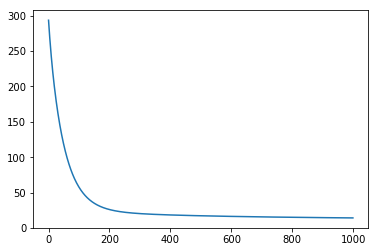

In [231]:
plt.plot(costs)
plt.show()

In [236]:
new_hypotheses = hypothesis(new_weights, bias_new)